In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Análisis Exploratorio de Datos

In [2]:
house_data = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

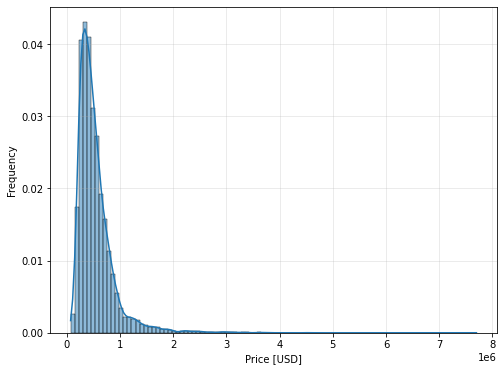

In [4]:
ax = plt.figure(figsize=(8,6)).gca()
sns.histplot(data=house_data, x='price', stat='frequency',
                bins=100, kde=True, ax=ax)
ax.set(xlabel='Price [USD]')
ax.grid(alpha=0.3)
plt.show()

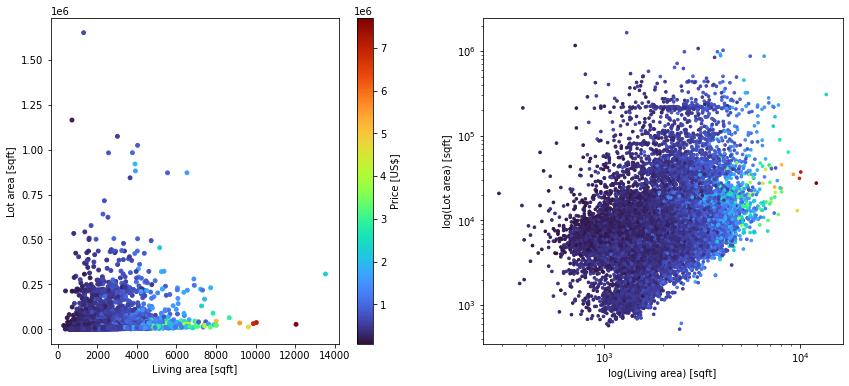

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,6))
plt.subplots_adjust(right=1.5)
points = ax[0].scatter(data=house_data, x='sqft_living', s=15, y='sqft_lot', c='price', cmap='turbo')

ax[1].scatter(data=house_data, x='sqft_living', s=7, y='sqft_lot', c='price', cmap='turbo')

ax[0].set(ylabel='Lot area [sqft]', xlabel='Living area [sqft]')
ax[1].set(xscale='log', yscale='log', ylabel='log(Lot area) [sqft]', xlabel='log(Living area) [sqft]')

plt.colorbar(ScalarMappable(cmap=points.get_cmap(), norm=points.norm), ax=ax[0], label='Price [US$]')
plt.show()

In [6]:
house_data.filter(like='sqft', axis=1).join(house_data.price)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1340,5650,221900
1,2570,7242,2170,400,1690,7639,538000
2,770,10000,770,0,2720,8062,180000
3,1960,5000,1050,910,1360,5000,604000
4,1680,8080,1680,0,1800,7503,510000
...,...,...,...,...,...,...,...
21608,1530,1131,1530,0,1530,1509,360000
21609,2310,5813,2310,0,1830,7200,400000
21610,1020,1350,1020,0,1020,2007,402101
21611,1600,2388,1600,0,1410,1287,400000


<AxesSubplot:>

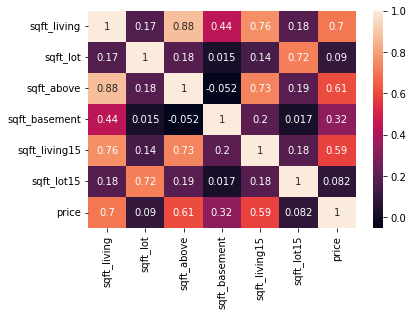

In [7]:
sns.heatmap(house_data.filter(like='sqft', axis=1).join(house_data.price).corr(), annot=True)

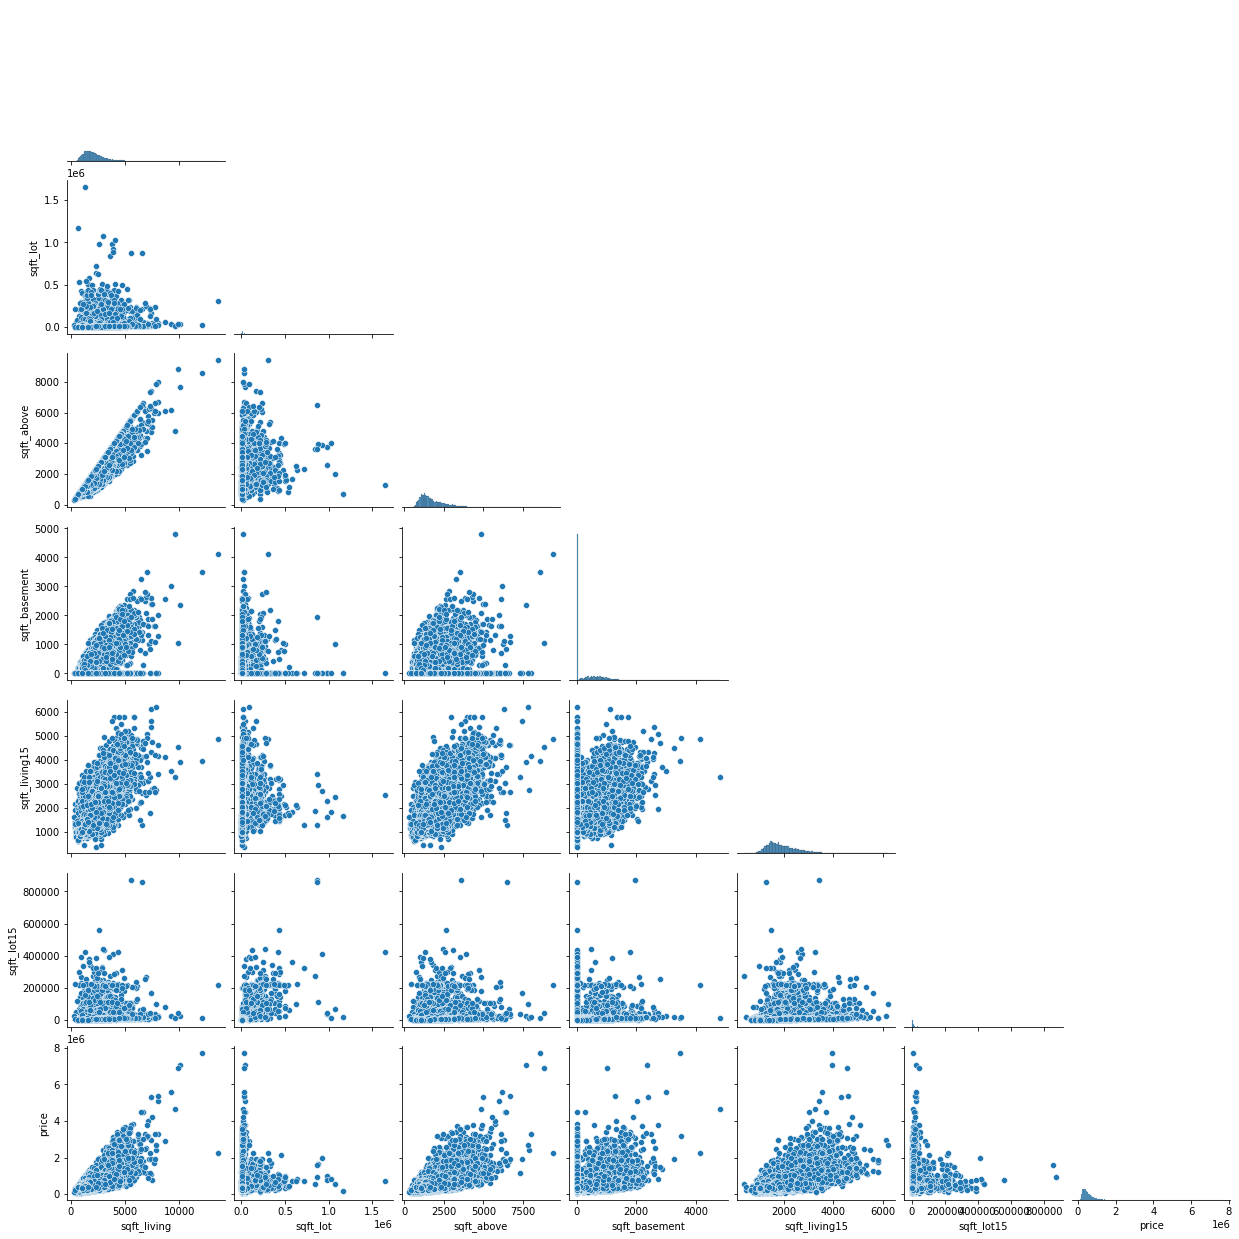

In [8]:
sns.pairplot(house_data.filter(like='sqft', axis=1).join(house_data.price), corner=True)

<AxesSubplot:>

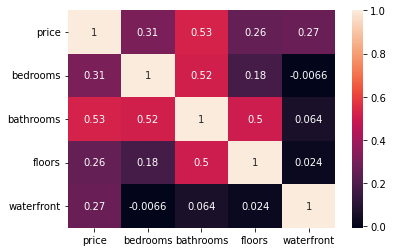

In [9]:
sns.heatmap(house_data[['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront']].corr(),annot=True)

<AxesSubplot:>

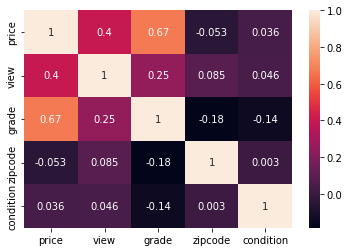

In [10]:
sns.heatmap(house_data[['price', 'view', 'grade', 'zipcode', 'condition']].corr(),
            annot=True)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

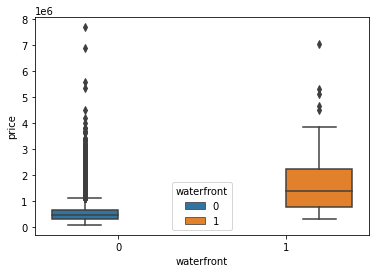

In [11]:
sns.boxplot(data=house_data, x='waterfront', y='price', hue='waterfront')

# Preprocesamiento

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
num_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
            'sqft_lot', 'floors', 'waterfront', 'view', 'grade']

data = house_data[num_cols]

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade
0,221900,3,1.00,1180,5650,1.0,0,0,7
1,538000,3,2.25,2570,7242,2.0,0,0,7
2,180000,2,1.00,770,10000,1.0,0,0,6
3,604000,4,3.00,1960,5000,1.0,0,0,7
4,510000,3,2.00,1680,8080,1.0,0,0,8


In [104]:
scaler = StandardScaler()
st_data = pd.DataFrame(np.abs(scaler.fit_transform(data.drop(['grade', 'waterfront'], axis=1))), 
                       columns=data.drop(['grade', 'waterfront'], axis=1).columns)

outlier_lim = 3

idxs = np.where(st_data.mask(st_data > outlier_lim, other=np.nan).isna().any(axis=1))[0]

data.drop(idxs, axis=0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade
0,221900,3,1.00,1180,5650,1.0,0,0,7
1,538000,3,2.25,2570,7242,2.0,0,0,7
2,180000,2,1.00,770,10000,1.0,0,0,6
3,604000,4,3.00,1960,5000,1.0,0,0,7
4,510000,3,2.00,1680,8080,1.0,0,0,8
...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,8
21609,400000,4,2.50,2310,5813,2.0,0,0,8
21610,402101,2,0.75,1020,1350,2.0,0,0,7
21611,400000,3,2.50,1600,2388,2.0,0,0,8


<AxesSubplot:>

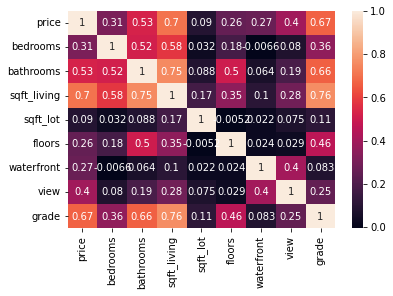

In [105]:
sns.heatmap(data.corr(), annot=True)

In [106]:
X = data.drop(['price', 'sqft_lot'], axis=1)
y = data['price']

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

MSE: 0.4678663263717648


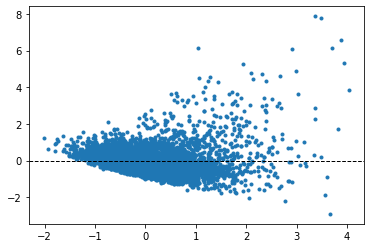

In [107]:
lr = LinearRegression()

lr.fit(X_train_st, y_train_st)
y_pred = lr.predict(X_test_st).reshape(-1,1)

print(f'MSE: {mean_squared_error(y_pred, y_test_st)}')

plt.plot(y_pred, y_test_st-y_pred, '.')
plt.axhline(0, color='k', ls='--',linewidth=1)

# Testeo de modelos

In [108]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [109]:
regressors = {'Linear':LinearRegression(),
    'RandomForest': RandomForestRegressor(), 
    'GradBoost':GradientBoostingRegressor(),
    'Huber':HuberRegressor()}

for name, reg in regressors.items():
    scores = cross_validate(reg, X, y, cv=3, scoring=['r2', 'neg_mean_squared_error'])
    print(f'{name}: r2 =', scores['test_r2'].mean(), '. MSE:', -1*scores['test_neg_mean_squared_error'].mean())


Linear: r2 = 0.5915677101771947 . MSE: 0.40792516973796733
RandomForest: r2 = 0.5988112210223471 . MSE: 0.4007797689667488
GradBoost: r2 = 0.6536846679420562 . MSE: 0.3457748820327713
Huber: r2 = 0.5653154126987391 . MSE: 0.43423746471936525


In [158]:
params = {'max_depth':[3,6],
'min_samples_split':[2,5], 
'n_estimators':[100, 120]}

gb = GradientBoostingRegressor()

gsparam = GridSearchCV(gb, param_grid=params, cv=3, scoring='neg_mean_squared_error').fit(X, y)

best_estimator = gsparam.best_estimator_

print(best_estimator.get_params().as)

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 120, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


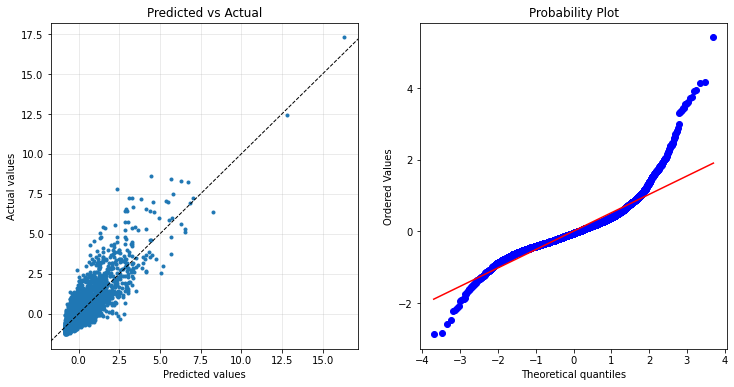

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

y_pred = best_estimator.predict(X_test)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,6))
plt.subplots_adjust(right=1.3)
ax[0].plot(y_pred, y_test.ravel(), '.')
ax[0].axline([0,0], [15,15], color='k', ls='--', linewidth=1)
ax[0].grid(alpha=0.3)
ax[0].set(xlabel='Predicted values', ylabel='Actual values', title='Predicted vs Actual')

residuals = y_test.ravel()-y_pred
res = stats.probplot(residuals, plot=ax[1])